# 5.6 규제 선형모델 - 릿지, 라쏘, 엘라스틱넷

### 5.6.1 개요
### 5.6.2 릿지회귀 : 선형회귀 + L2 
### 5.6.3 라쏘회귀 : 선형회귀 + L1
### 5.6.4 엘라스틱회귀 : 선형회귀 + L1 + L2
### 5.6.5 선형회귀모델을 위한 데이터변환

### -------------------------------------------------------------------------------------------------------------------------------------------------------

### 5.6.1 개요 

 - 좋은 머신러닝 회귀모델의 특징?
 
 ```
 : if) 차수가 너무 낮으면 -> 과소적합 문제 발생
   elif) 차수가 너무 높으면 -> 과대적합 문제 발생
  --> So, 회귀모델은 (적절히 데이터에 적합)하면서도, (회귀계수가 기하급수적으로 커지는 것을 제어)할 수 있어야한다.
 ```
 
 - 선형 모델 : RSS 최소화에만 신경씀.   (비용함수)=Min(RSS(W))
 
 
 ![선형모델](./5.6.1개요1.png)
 
  ```
 L2규제(큰걸 줄임) : 상대적으로 큰 회귀계수값의 예측정확도를 감소시키기위해 회귀계수값을 작게 만듦
 L1규제(작은걸 없앰) : 예측영향력이 작은 피처의 회귀계수를 0으로 만듦
 ```
 - 규제선형모델의 비용함수
 
 ![규제선형모델](./5.6.1개요2.png)
 ![규제선형모델2](./5.6.1개요3.png)

(L2, L1 규제의 참고자료) https://light-tree.tistory.com/125

### 5.6.2 릿지회귀 : 선형회귀 + L2 

```
 : 사이킷런 Ridge 클래스를 통해 릿지회귀 구현 (from sklearn.linear_model import Ridge)
 : Ridge의 주요 생성 파라미터는 alpha
 
(예제)
    - 보스턴 주택가격(load_boston)을 Ridge를 통해 예측 
    - 예측성능을 cross_val_score()로 평가 (alpha=10, cv=5로 설정)
    - (성능평가지표)MSE, RMSE, 평균 RMSE
    - alpha 값을 0,0.1,1,10,100으로 변화시키며 RMSE와 회귀계수값(coef_)의 변화를 살펴보기
```

In [1]:
#Step1. 보스턴 데이터 로드->Step2. 선형회귀/릿지회귀 성능비교->Step3. alpha값의 변화에 따른 릿지회귀 성능비교
#Step1. 보스턴 데이터 로드
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#boston data load
boston=load_boston()

boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE']=boston.target

y_target=boston_df['PRICE']
X_data=boston_df.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)

In [2]:
#Step2. 선형회귀/릿지회귀 성능비교
# 선형회귀(LinearRegression) Version
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
y_preds=lr_clf.predict(X_test)
neg_mse_scores=cross_val_score(lr_clf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
#rmse_scores는 배열 형태(cv 개수 만큼의 배열)
rmse_scores=np.sqrt(-1*neg_mse_scores)
print("===========LinearRegression===========")
print("5Fold의 평균 RMSE : {0:.3f}".format(np.mean(rmse_scores)))

===========LinearRegression===========
5Fold의 평균 RMSE : 5.829


In [3]:
# 릿지회귀(RidgeRegression) Version
#alpha=10으로 설정해 릿지 수행

ridge_clf=Ridge(alpha=10)
ridge_clf.fit(X_train,y_train)
neg_mse_scores_r=cross_val_score(ridge_clf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
#rmse_scores_r 은 배열형태
rmse_scores_r=np.sqrt(-1*neg_mse_scores_r)
print("===========RidgeRegression===========")
print("5Fold의 평균 RMSE : {0:.3f}".format(np.mean(rmse_scores_r)))

===========RidgeRegression===========
5Fold의 평균 RMSE : 5.518


### (퀴즈)
### 결과해석 - 선형회귀의 평균 RMSE는 5.829, 릿지회귀의 평균 RMSE는 5.518 이므로 (선형회귀/릿지회귀)의 예측 성능이 더 좋다.

In [4]:
#Step3. alpha값의 변화에 따른 릿지회귀 성능비교
#릿지의 alpha rkqtdmf 0,0.1,1,10,100 으로 변화시키면서 RMSE와 회귀계수값의 변화를 살펴봄.
alphas=[0,0.1,1,10,100]
for al in alphas:
    ridge_clf=Ridge(alpha=al)
    ridge_clf.fit(X_train,y_train)
    neg_mse_scores_r=cross_val_score(ridge_clf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    #rmse_scores_r 은 배열형태
    rmse_scores_r=np.sqrt(-1*neg_mse_scores_r)
    print("===========RidgeRegression===========")
    print("alpha값 : {0}, 5Fold의 평균 RMSE : {1:.3f}".format(al,np.mean(rmse_scores_r)))

===========RidgeRegression===========
alpha값 : 0, 5Fold의 평균 RMSE : 5.829
===========RidgeRegression===========
alpha값 : 0.1, 5Fold의 평균 RMSE : 5.788
===========RidgeRegression===========
alpha값 : 1, 5Fold의 평균 RMSE : 5.653
===========RidgeRegression===========
alpha값 : 10, 5Fold의 평균 RMSE : 5.518
===========RidgeRegression===========
alpha값 : 100, 5Fold의 평균 RMSE : 5.330


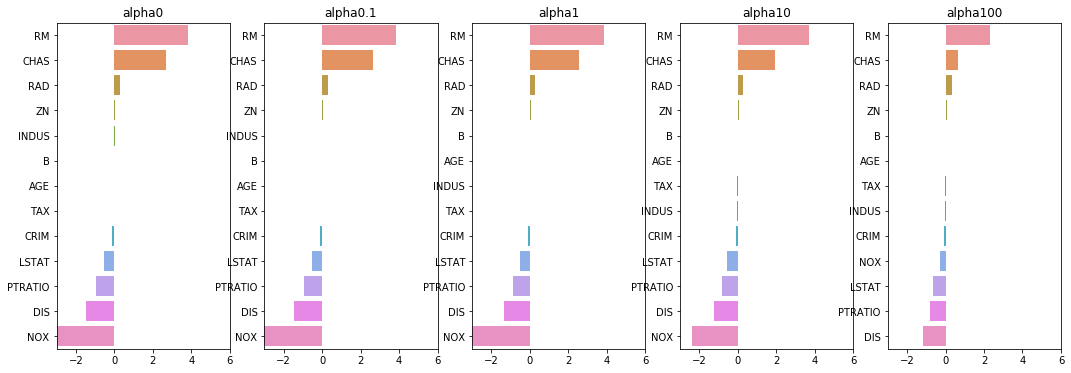

In [5]:
import seaborn as sns
#alpha 값에 변화에 따른 피처의 회귀계수값을 가로 막대 그래프로 시각화
#회귀계수(coef_) 추출 뒤, Series 객체로 만들어서 시본 가로 막대차트로 표시하고 DataFrame에 alpha 값별 회귀계수로 저장함

#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig,axs=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
#각 alpha에 다른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df=pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos,alpha in enumerate(alphas):
    ridge=Ridge(alpha)
    ridge.fit(X_data,y_target)
    #alpha에 따른 피처별로 회귀계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff=pd.Series(ridge.coef_,index=X_data.columns)
    colname='alpha'+str(alpha)
    coeff_df[colname]=coeff
    #막대 그래프로 각 alpha 값에서의 회귀계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff=coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
#for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame 으로 표시
plt.show()

 - 결과 : alpha 값이 증가 하면서, 회귀계수가 지속적으로 작아짐. 

### 5.6.3 라쏘회귀 : 선형회귀 + L1
```
 : 사이킷런 Lasso 클래스를 통해 라쏘회귀 구현(from sklearn.linear_model import Lasso)
 : 단점 - alpha 값에 따라 피처가 선택되므로, 회귀계수값이 급격히 변동
```
### 5.6.4 엘라스틱넷 : 선형회귀 + L1 + L2
```
 : 엘라스틱넷 비용함수
```
![엘라스틱넷](./5.6.4엘라스틱넷1.png)
```
 : 단점 - 수행시간이 릿지회귀나 라쏘회귀에 비해 상대적으로 오래걸림
 : ElasticNet의 주요 생성 파라미터 : alpha, l1_ratio
 ```
 

### - 릿지회귀, 라쏘회귀, 엘라스틱넷 회귀를 선택하여 학습/평가를 수행하는 함수 구현하기 

#### 함수 : get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True)

In [6]:
from sklearn.linear_model import Lasso,ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df=pd.DataFrame()
    if verbose : print("##############",model_name,"##############")
    for param in params:
        if model_name=='Ridge':model=Ridge(alpha=param)
        elif model_name=='Lasso':model=Lasso(alpha=param)
        elif model_name=='ElasticNet':model=ElasticNet(alpha=param,l1_ratio=0.7)
        
        neg_mse_scores=cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print("alpha {0}일 때 5폴드세트의 평균 RMSE : {1:.3f}".format(param,avg_rmse))
        #cross_val_score는 evaluation metric 만 반환하므로 모델을 다시 학습하여 회귀계수 추출
        model.fit(X_data,y_target)
        #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff=pd.Series(data=model.coef_,index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname]=coeff
    return coeff_df


### (퀴즈)

In [7]:
#get_linear_reg_eval2 func 만들기 - alphas 배열에서 alpha 값에 따른 평균 RMSE의 최솟값과 그 때의 alpha 값을 print 해주는 기능 추가.
#def get_linear_reg_eval2(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
   

In [8]:
#lasso에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 추출
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso',lasso_alphas,X_data,y_target,verbose=True)
coeff_lasso_df

############## Lasso ##############
alpha 0.07일 때 5폴드세트의 평균 RMSE : 5.612
alpha 0.1일 때 5폴드세트의 평균 RMSE : 5.615
alpha 0.5일 때 5폴드세트의 평균 RMSE : 5.669
alpha 1일 때 5폴드세트의 평균 RMSE : 5.776
alpha 3일 때 5폴드세트의 평균 RMSE : 6.189


alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
RM         3.789725   3.703202   2.498212  0.949811  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
B          0.010248   0.010249   0.009469  0.008247  0.006510
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679

In [9]:
#반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.789725   3.703202   2.498212  0.949811  0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
B          0.010248   0.010249   0.009469  0.008247  0.006510
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000

### (퀴즈) - get_linear_reg_eval 응용 문제

In [10]:
elastic_alphas=[0.04,0.2,0.7,1,1,3,10]
#elasticNet 을 이용한 get_linear_reg_eval() 함수 추출 : coeff_elastic_df 으로 변수이름 선언


In [11]:
#반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력(sort_values 이용)


### 5.6.5 선형회귀모델을 위한 데이터변환

 - 선형모델은 일반적으로 피처와 타깃값 간에 선형관계가 있다고 가정
   & 피처값과 타깃값의 분포가 정규분포인 것을 선호
 - 선형회귀모델 적용 전, 스케일링/정규화 작업을 수행하는 것이 일반적
 
- 스케일링/정규화작업에는 3가지 방법이 있음
![스케일링/정규화작업](./5.6.5데이터변환.png)

 - 1번방법 : 정규화를 한다고해서 무조건 예측성능이 향상되는건 아님.
 - 2번방법 : 과적합가능성
 - 1,2번 방법 : 원본데이터로 원복하기 어려움
 - 3번 방법이 제일 많이 쓰임
 
 ```
 
 (예제)
 보스턴 주택가격 피처 데이터 세트에
  -> 위에서 언급한 표준정규분포(Standard)변환, 최댓값/최솟값(MinMax) 정규화, 로그변환(Log) 차례로 적용
  ->RMSE로 각 경우별 예측성능 측정
  ==>get_scaled_data 함수 만들기
  ```

In [12]:
#method는 표준 정규 분포 변환(Standard),최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
#p_degree는 다항식 특성을 사용할 때 적용, p_degree는 2 이상 부여하지 않음.
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
def get_scaled_data(method=None,p_degree=None,input_data=None):
    if method=='Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data=input_data
    
    if p_degree!=None:
        scaled_data=PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [13]:
#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas=[0.1,1,10,100]

#5개 방식으로 변환, 먼저 원본 그대로, 표준정규분포, 표준정규분포+다항식특성,최대최소,최대최소+다항식특성
scale_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]

for scale_method in scale_methods:
    scaled_data=get_scaled_data(scale_method[0],scale_method[1],X_data)
    print('\n ##변환유형 {0}, Polynomial Degree : {1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',alphas,scaled_data,y_target,verbose=False)


 ##변환유형 None, Polynomial Degree : None
alpha 0.1일 때 5폴드세트의 평균 RMSE : 5.788
alpha 1일 때 5폴드세트의 평균 RMSE : 5.653
alpha 10일 때 5폴드세트의 평균 RMSE : 5.518
alpha 100일 때 5폴드세트의 평균 RMSE : 5.330

 ##변환유형 Standard, Polynomial Degree : None
alpha 0.1일 때 5폴드세트의 평균 RMSE : 5.826
alpha 1일 때 5폴드세트의 평균 RMSE : 5.803
alpha 10일 때 5폴드세트의 평균 RMSE : 5.637
alpha 100일 때 5폴드세트의 평균 RMSE : 5.421

 ##변환유형 Standard, Polynomial Degree : 2
alpha 0.1일 때 5폴드세트의 평균 RMSE : 8.827
alpha 1일 때 5폴드세트의 평균 RMSE : 6.871
alpha 10일 때 5폴드세트의 평균 RMSE : 5.485
alpha 100일 때 5폴드세트의 평균 RMSE : 4.634

 ##변환유형 MinMax, Polynomial Degree : None
alpha 0.1일 때 5폴드세트의 평균 RMSE : 5.764
alpha 1일 때 5폴드세트의 평균 RMSE : 5.465
alpha 10일 때 5폴드세트의 평균 RMSE : 5.754
alpha 100일 때 5폴드세트의 평균 RMSE : 7.635

 ##변환유형 MinMax, Polynomial Degree : 2
alpha 0.1일 때 5폴드세트의 평균 RMSE : 5.298
alpha 1일 때 5폴드세트의 평균 RMSE : 4.323
alpha 10일 때 5폴드세트의 평균 RMSE : 5.185
alpha 100일 때 5폴드세트의 평균 RMSE : 6.538

 ##변환유형 Log, Polynomial Degree : None
alpha 0.1일 때 5폴드세트의 평균 RMSE : 4.770
alpha 1일 때 5폴드

### 5.7 로지스틱 회귀
```
 : 선형방식을 분류에 적용한 알고리즘
 : 시그모이드(Sigmoid) 함수 최적선 find
     & 시그모이드 함수 반환값을 확률로 간주해 확률에 따라 분류 결정
 ```
 ![시그모이드함수](./5.7로지스틱회귀.png)
 
 (시그모이드 함수의 정의) - 1/(1+e^(-x))
 

 : 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터 - penalty(규제유형설정), C(alpha의 역수값) 

In [14]:
#실습코드(위스콘신유방암데이터세트, 악성종양 =1, 종양=0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

cancer=load_breast_cancer()


In [15]:
#StandardScaler로 평균이 0, 분산 1로 데이터 분포도 변환
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)
X_train,X_test,y_train,y_test=train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)

In [16]:
import warnings
warnings.filterwarnings("ignore") # 빨간색 경고문을 안뜨게 만듦

#로지스틱 회귀를 이용해 학습 및 예측을 수행하고 정확도와 ROC-AUC를 구함
from sklearn.metrics import accuracy_score,roc_auc_score

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
print("정확도 : {0:.4f}, ROC-AUC : {1:.4f}".format(accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)))

정확도 : 0.9825, ROC-AUC : 0.9795


In [17]:
#GridSearchCV를 이용해 위스콘신 데이터 세트에서 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2','l1'],'C':[0.01,0.1,1,5,10]}
grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))


최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.979


### 5.8 회귀트리
```
선형회귀 - 회귀계수의 관계를 모두 선형으로 가정(회귀함수 기반으로 결과값도출)
    ==> 회귀계수를 기반으로 '최적 회귀함수'를 도출하는 것이 주요 목표
   
  but, 회귀트리는 함수가 아닌 트리를 기반으로 하는 회귀방식
```

 - 회귀트리 : 분류트리와 비슷
 - 리프노드에 속한 데이터 값의 평균값을 구해 회귀예측값을 계산
 ![리프노드](./5.8회귀트리1.png)
 
 - X값의 균일도를 반영한 지니계수에 따라 분할
 - 계단형태로 회귀선을 만듦
![클래스](./5.8회귀트리2.png)


```
(예제)
보스턴 주택가격 예측 
 Step1. RandomForestRegressor 이용
 Step2. 평균 RMSE를 계산해주는 get_model_cv_prediction() 만들기
 Step3. 결정트리(DecisionTree),GBM, LightGBM의 Regressor모두 이용하여 평균 RMSE 구하기
 Step4. 피처별 중요도를 반환하는 feature_importances_를 이용해 시각화
```

In [18]:
#보스턴 데이터 세트 로드
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE']=boston.target

y_target=boston_df['PRICE']
X_data=boston_df.drop(['PRICE'],axis=1,inplace=False)


In [19]:
#Step1. RandomForestRegressor 이용
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_score=cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_score)
avg_rmse=np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE Scores : ',np.round(neg_mse_score,2))
print('5 교차 검증의 개별 RMSE Socres : {0:.2f}',np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE Scores :  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
5 교차 검증의 개별 RMSE Socres : {0:.2f} [2.82 3.61 4.53 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.420


In [20]:
#Step2. 평균 RMSE를 계산해주는 get_model_cv_prediction() 만들기
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores=cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print("####",model.__class__.__name__,"####")
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))
    

In [21]:
 #Step3. 결정트리(DecisionTree),GBM, LightGBM의 Regressor모두 이용하여 평균 RMSE 구하기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 수행
models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE : 4.420
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE : 4.272
[23:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:07:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#### XGBRegressor ####
5 교차 검증의 평균 RMSE : 4.089
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 4.646


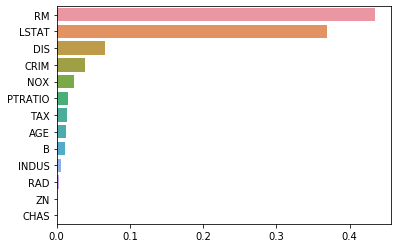

In [22]:
# Step4. 피처별 중요도를 반환하는 feature_importances_를 이용해 시각화
import seaborn as sns
%matplotlib inline
rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(feature_series,feature_series.index)

(100, 2)


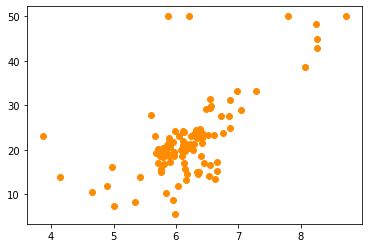

In [23]:
import matplotlib.pyplot as plt
#max_depth의 크기를 변화시키면서 어떻게 회귀트리 예측선이 변화하는지 살펴봄
#2차원 평면상에서 회귀 예측선을 쉽게 표현하기 위해 target과 가장 밀접한 상관관계를 보이는 RM feature만 이용
# 100개만 샘플링
boston_df_sample=boston_df[['RM','PRICE']]
boston_df_sample=boston_df_sample.sample(n=100,random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')

In [24]:
from sklearn.linear_model import LinearRegression
#선형 회귀와 결정트리 기반의 Regressor 생성, DecisionTree의 max_depth는 각각 2,7
lr_reg=LinearRegression()
dt_reg2=DecisionTreeRegressor(max_depth=2)
dt_reg7=DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는RM만, 그리고 결정데이터인 PRICE 추출
X_feature=boston_df_sample['RM'].values.reshape(-1,1)
y_target=boston_df_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature,y_target)
dt_reg2.fit(X_feature,y_target)
dt_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_dt2=dt_reg2.predict(X_test)
pred_dt7=dt_reg7.predict(X_test)

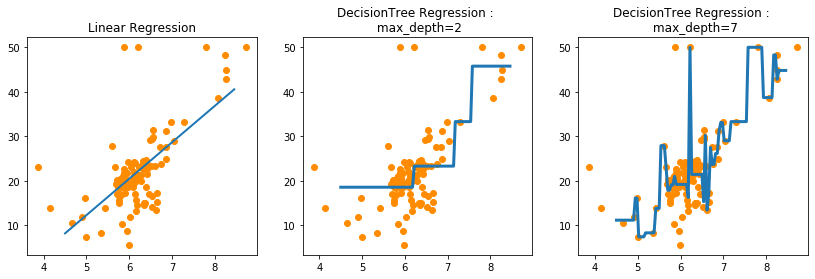

In [25]:
#예측한 Price 회귀선 (pred_lr, pred_dt2,pred_dt7) 그리기 - 시각화
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(14,4),ncols=3)

#X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정트리 회귀 예측선 시각화
#선형회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title("DecisionTree Regression : \n max_depth=2")
ax2.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')
ax2.plot(X_test,pred_dt2,label='max_depth:2',linewidth=3)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title("DecisionTree Regression : \n max_depth=7")
ax3.scatter(boston_df_sample['RM'],boston_df_sample['PRICE'],c='darkorange')
ax3.plot(X_test,pred_dt7,label='max_depth:7',linewidth=3)

-----------------------------------------------------------------------------------------------------------------------------